# Feature engineering(Preprocessing)

- Data validation
- Missing values
### Categorical values
- Converting categorical to numerical 
### Numerical values
- Temporal variables
- Handling outliers in continous variables
- Transformation
### Data scaling
- Feature scaling
- Finding multi-collinearity

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
train_set=pd.read_csv('train_data.csv')
test_set=pd.read_csv('test_data.csv')

In [164]:
data_frame=train_set.copy()

In [165]:
data_frame.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data validation

- One categorical sample test(For 1 continuos_feature)
- chi-square test(For 2 categorical features)
- Correlation(For 2 continuos features)
- ttest(For 1 numerical and 1 categorical having only 2 categories)

### One sample test for continuos feature

In [166]:
from scipy.stats import ttest_1samp

In [167]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [168]:
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [169]:
h0='There is no difference'
h1='There is a difference'
for cols in continuos_features:
    alpha=0.5
    print('One sample test for ',cols)
    population=data_frame[cols]
    population_mean=population.mean()
    sample_size=int(len(data_frame[cols])/3)
    sample_data=np.random.choice(population,sample_size)
    ttest,p_value=ttest_1samp(sample_data,popmean=population_mean)
    print('p_value: ',p_value)
    if p_value<alpha:
        print('Accept alternative hypothesis')
        print(h1)
    else:
        print('Accept null hypothesis')
        print(h0)
    print('------------------------------------------------------------')

One sample test for  age
p_value:  0.483135736568045
Accept alternative hypothesis
There is a difference
------------------------------------------------------------
One sample test for  fnlwgt
p_value:  0.8052316677795475
Accept null hypothesis
There is no difference
------------------------------------------------------------
One sample test for  capital_gain
p_value:  0.8381784044814247
Accept null hypothesis
There is no difference
------------------------------------------------------------
One sample test for  capital_loss
p_value:  0.9981345730319193
Accept null hypothesis
There is no difference
------------------------------------------------------------
One sample test for  hours_per_week
p_value:  0.37849164600211405
Accept alternative hypothesis
There is a difference
------------------------------------------------------------


### Chi-square test for two categorical features

In [170]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [171]:
def chi_square(col1,col2):
    #define null and alternate hypothesis
    h0='There is no difference'
    h1='There is a difference'
    #define alpha value
    alpha=0.5
    #get observed values using crosstab().values
    observed_values=pd.crosstab(data_frame[col1],data_frame[col2]).values
    rows=observed_values.shape[0]
    cols=observed_values.shape[1]
    #calculate degree of freedom.
    dof=(rows-1)*(cols-1)
    chi2_value,p_value,dof,expected_values=chi2_contingency(observed_values)
    #find the critical value
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    #calculate chi2_square
    values=[]
    for obv,exp in zip(observed_values,expected_values):
        value=((obv-exp)**2)/exp
        values.append(value)
    chi_square_values=sum(values)
    chi_square_statistic_value=sum(chi_square_values)
    print('critical_value: ',critical_value)
    print('chi_square_statistic_value: ',chi_square_statistic_value)
    #state results
    if chi_square_statistic_value>critical_value:
        print('Accept alternate hypothesis(h1)')
        print(h1)
    else:
        print('Accept null hypothesis(h0)')
        print(h0)

In [172]:
#getting the combinations of categorical features to perform chi_square test.
feature_combinations=[]
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1!=col2:
            feature_combinations.append([col1,col2])

In [173]:
#removing repeated combinations
for i in feature_combinations:
    rev_value=[i[1],i[0]]
    if rev_value in feature_combinations:
        feature_combinations.remove(rev_value)

In [174]:
#calling chi_square function for every unique combination.
for cols in feature_combinations:
    feature1=cols[0]
    feature2=cols[1]
    print('chi-square test for ',feature1,' and ',feature2)
    chi_square(feature1,feature2)
    print('------------------------------------------------------')

chi-square test for  workclass  and  education
critical_value:  119.33399578175585
chi_square_statistic_value:  2572.1048319192323
Accept alternate hypothesis(h1)
There is a difference
------------------------------------------------------
chi-square test for  workclass  and  marital_status
critical_value:  47.33500455045263
chi_square_statistic_value:  1413.5586972450483
Accept alternate hypothesis(h1)
There is a difference
------------------------------------------------------
chi-square test for  workclass  and  occupation
critical_value:  111.33404340701982
chi_square_statistic_value:  41676.6479735981
Accept alternate hypothesis(h1)
There is a difference
------------------------------------------------------
chi-square test for  workclass  and  relationship
critical_value:  39.33534484661134
chi_square_statistic_value:  1586.371842937078
Accept alternate hypothesis(h1)
There is a difference
------------------------------------------------------
chi-square test for  workclass  and 

### ttest for indepedent continuos features

In [175]:
h1='There is a difference'
h0='There is no difference'

In [176]:
from scipy import stats

In [177]:
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [178]:
ttest,p_value=stats.ttest_ind(data_frame['age'],data_frame['fnlwgt'],equal_var=False)

In [179]:
def ttest_ind(col1,col2):
    alpha=0.5
    print('ttest for ',col1,' and ',col2)
    ttest,p_value=stats.ttest_ind(data_frame[col1],data_frame[col2],equal_var=False)
    if p_value<alpha:
        print('p-value: ',p_value)
        print('Accept h1(alternative hypothesis)')
        print(h1)
    else:
        print('p-value: ',p_value)
        print('Accept h0(null hypothesis)')


In [180]:
#getting the combinations of categorical features to perform chi_square test.
feature_combinations=[]
for col1 in continuos_features:
    for col2 in numerical_features:
        if col1!=col2:
            feature_combinations.append([col1,col2])

In [181]:
#removing repeated combinations
for i in feature_combinations:
    rev_value=[i[1],i[0]]
    if rev_value in feature_combinations:
        feature_combinations.remove(rev_value)

In [182]:
 #calling chi_square function for every unique combination.
for cols in feature_combinations:
    feature1=cols[0]
    feature2=cols[1]
    ttest_ind(feature1,feature2)
    print('------------------------------------------------------')

ttest for  age  and  fnlwgt
p-value:  0.0
Accept h1(alternative hypothesis)
There is a difference
------------------------------------------------------
ttest for  age  and  education_num
p-value:  0.0
Accept h1(alternative hypothesis)
There is a difference
------------------------------------------------------
ttest for  age  and  capital_gain
p-value:  8.102467146809197e-141
Accept h1(alternative hypothesis)
There is a difference
------------------------------------------------------
ttest for  age  and  capital_loss
p-value:  1.1534819697284895e-104
Accept h1(alternative hypothesis)
There is a difference
------------------------------------------------------
ttest for  age  and  hours_per_week
p-value:  7.795866209612457e-74
Accept h1(alternative hypothesis)
There is a difference
------------------------------------------------------
ttest for  fnlwgt  and  education_num
p-value:  0.0
Accept h1(alternative hypothesis)
There is a difference
-------------------------------------------

### Correlation

In [183]:
data_frame[continuos_features].corr()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital_gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.078409,0.054256,1.000000


There's no correlation between the continuos features.

## Handling missing values

In [184]:
data_frame.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

There are no missing(NaN) values in the data

## Handling categorical features

In [185]:
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)

In [186]:
data_frame[categorical_features].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Finding the cardinality of categorical features.

In [187]:
for cols in categorical_features:
    print(cols,' has ',len(data_frame[cols].unique()),' unique values')

workclass  has  9  unique values
education  has  16  unique values
marital_status  has  7  unique values
occupation  has  15  unique values
relationship  has  6  unique values
race  has  5  unique values
sex  has  2  unique values
native_country  has  42  unique values
wage_class  has  2  unique values


In [188]:
for cols in categorical_features:
    rank=data_frame[cols].value_counts(ascending=True).index
    mapping={i:k for k,i in enumerate(rank,0)}
    data_frame[cols]=data_frame[cols].map(mapping)

In [189]:
data_frame[categorical_features].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,4,13,5,11,4,4,1,41,1
1,7,13,6,12,5,4,1,41,1
2,8,15,4,5,4,4,1,41,1
3,8,10,6,5,5,3,1,41,1
4,8,13,6,14,1,3,0,32,1


Categorical features are converted to numerical features.

### Numerical features

- Handling outliers
- Transformation of values

In [190]:
discrete_features=[]
continuos_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if len(data_frame[cols].unique())>25:
            continuos_features.append(cols)
        else:
            discrete_features.append(cols)

In [191]:
data_frame[continuos_features].head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,native_country
0,39,77516,2174,0,40,41
1,50,83311,0,0,13,41
2,38,215646,0,0,40,41
3,53,234721,0,0,40,41
4,28,338409,0,0,40,32


In [192]:
data_frame[discrete_features].head()

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,wage_class
0,4,13,13,5,11,4,4,1,1
1,7,13,13,6,12,5,4,1,1
2,8,15,9,4,5,4,4,1,1
3,8,10,7,6,5,5,3,1,1
4,8,13,13,6,14,1,3,0,1


### Handling outliers 

In [193]:
def outliers(cols):
    std=np.std(data_frame[cols])
    median=data_frame[cols].median()
    mean=data_frame[cols].mean()
    threshold=3
    for i in data_frame[cols]:
        z_score=(i-mean)/std
        if z_score>threshold:
            data_frame[cols].replace(i,median,inplace=True)

In [194]:
for cols in continuos_features:
    outliers(cols)

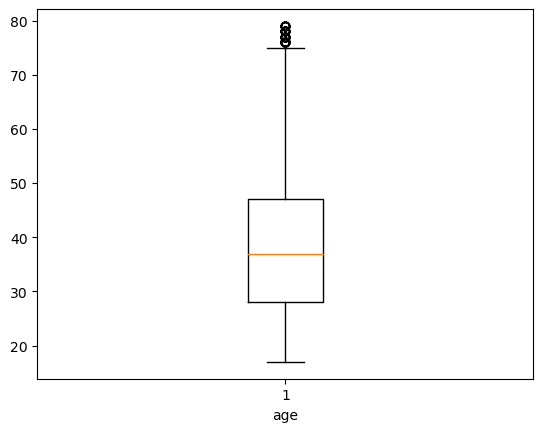

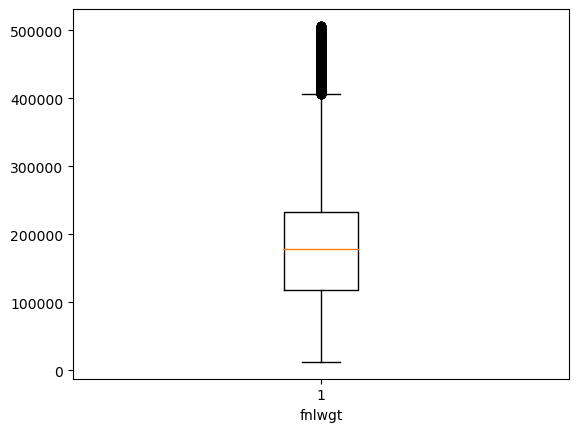

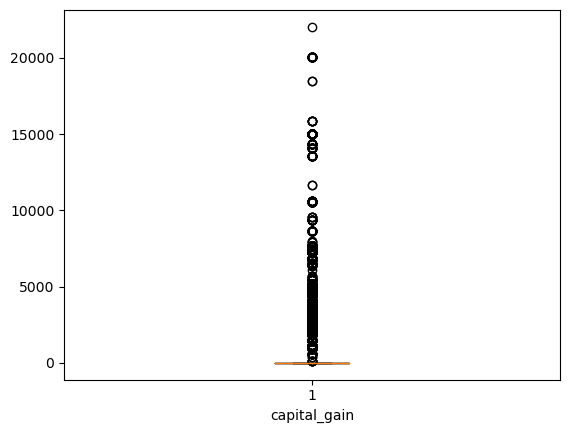

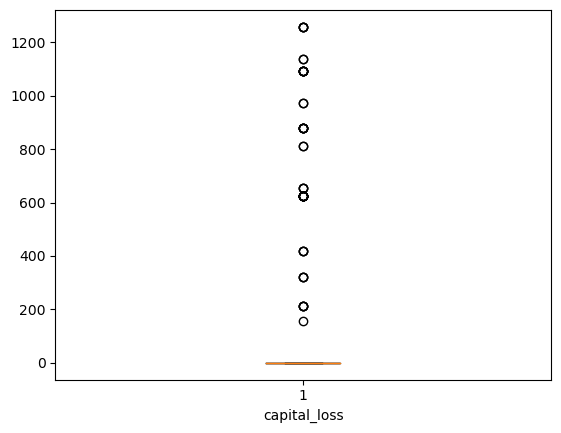

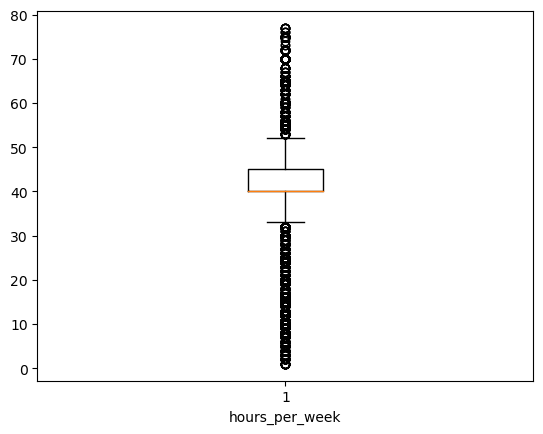

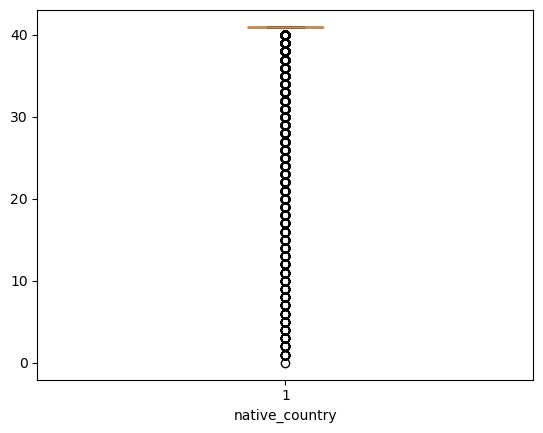

In [195]:
for cols in continuos_features:
    plt.boxplot(data_frame[cols])
    plt.xlabel(cols)
    plt.show()

In [196]:
data_frame.to_csv('before_trans.csv',index=False)

### Tranforming the values in continuos data to log value data.

In [197]:
for cols in continuos_features:
    if 0 in data_frame[cols].unique():
        pass
    else:
        data_frame[cols]=np.log(data_frame[cols])

In [198]:
data_frame[continuos_features].head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,native_country
0,3.663562,11.258240,2174,0,3.688879,41
1,3.912023,11.330336,0,0,2.564949,41
2,3.637586,12.281393,0,0,3.688879,41
3,3.970292,12.366153,0,0,3.688879,41
4,3.332205,12.732011,0,0,3.688879,32


In [199]:
data_frame.to_csv('after_trans.csv',index=False)

## Data scaling

In [200]:
data_frame.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,3.663562,4,11.258240,13,13,5,11,4,4,1,2174,0,3.688879,41,1
1,3.912023,7,11.330336,13,13,6,12,5,4,1,0,0,2.564949,41,1
2,3.637586,8,12.281393,15,9,4,5,4,4,1,0,0,3.688879,41,1
3,3.970292,8,12.366153,10,7,6,5,5,3,1,0,0,3.688879,41,1
4,3.332205,8,12.732011,13,13,6,14,1,3,0,0,0,3.688879,32,1


In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
scaler=MinMaxScaler()

In [203]:
input_x=data_frame.iloc[:,:-1]
scaler.fit(input_x)

MinMaxScaler()

In [204]:
scaled_data=scaler.transform(input_x)

In [205]:
pd.DataFrame(scaled_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.540509,0.500,0.495348,0.866667,0.800000,0.833333,0.785714,0.8,1.00,1.0,0.098639,0.0,0.849228,1.000000
1,0.702243,0.875,0.514735,0.866667,0.800000,1.000000,0.857143,1.0,1.00,1.0,0.000000,0.0,0.590484,1.000000
2,0.523600,1.000,0.770478,1.000000,0.533333,0.666667,0.357143,0.8,1.00,1.0,0.000000,0.0,0.849228,1.000000
3,0.740173,1.000,0.793270,0.666667,0.400000,1.000000,0.357143,1.0,0.75,1.0,0.000000,0.0,0.849228,1.000000
4,0.324814,1.000,0.891650,0.866667,0.800000,1.000000,1.000000,0.2,0.75,0.0,0.000000,0.0,0.849228,0.780488


In [206]:
scaled_data_frame=pd.DataFrame(scaled_data,columns=input_x.columns)

In [207]:
scaled_data_frame.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.540509,0.500,0.495348,0.866667,0.800000,0.833333,0.785714,0.8,1.00,1.0,0.098639,0.0,0.849228,1.000000
1,0.702243,0.875,0.514735,0.866667,0.800000,1.000000,0.857143,1.0,1.00,1.0,0.000000,0.0,0.590484,1.000000
2,0.523600,1.000,0.770478,1.000000,0.533333,0.666667,0.357143,0.8,1.00,1.0,0.000000,0.0,0.849228,1.000000
3,0.740173,1.000,0.793270,0.666667,0.400000,1.000000,0.357143,1.0,0.75,1.0,0.000000,0.0,0.849228,1.000000
4,0.324814,1.000,0.891650,0.866667,0.800000,1.000000,1.000000,0.2,0.75,0.0,0.000000,0.0,0.849228,0.780488


In [208]:
modified_data=pd.concat([scaled_data_frame,data_frame[['wage_class']].reset_index(drop=True)],axis=1)

In [209]:
modified_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,0.540509,0.500,0.495348,0.866667,0.800000,0.833333,0.785714,0.8,1.00,1.0,0.098639,0.0,0.849228,1.000000,1
1,0.702243,0.875,0.514735,0.866667,0.800000,1.000000,0.857143,1.0,1.00,1.0,0.000000,0.0,0.590484,1.000000,1
2,0.523600,1.000,0.770478,1.000000,0.533333,0.666667,0.357143,0.8,1.00,1.0,0.000000,0.0,0.849228,1.000000,1
3,0.740173,1.000,0.793270,0.666667,0.400000,1.000000,0.357143,1.0,0.75,1.0,0.000000,0.0,0.849228,1.000000,1
4,0.324814,1.000,0.891650,0.866667,0.800000,1.000000,1.000000,0.2,0.75,0.0,0.000000,0.0,0.849228,0.780488,1


## Multi-collinearity

In [210]:
import statsmodels.api as sm

In [211]:
x=data_frame.iloc[:,:-1]
y=data_frame.iloc[:,-1]

In [212]:
X=sm.add_constant(x)

In [213]:
model=sm.OLS(y,X).fit()

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             wage_class   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     1105.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:36:54   Log-Likelihood:                -12207.
No. Observations:               32561   AIC:                         2.444e+04
Df Residuals:                   32546   BIC:                         2.457e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9905      0.054     55.798      0.000       2.885       3.096
age               -0.2373      0.006    -40.558      0.000      -0.249      -0.226
workclass          0.0075      0.001      6.115      0.000       0.005       0.010
fnlwgt            -0.0120      0.003     -3.754      0.000      -0.018      -0.006
education          0.0084      0.001     13.487      0.000       0.007       0.010
education_num     -0.0404      0.001    -48.226      0.000      -0.042      -0.039
marital_status    -0.0858      0.002    -42.176      0.000      -0.090      -0.082
occupation        -0.0073      0.001    -11.491      0.000      -0.009      -0.006
relationship      -0.0029      0.002     -1.575      0.115      -0.007       0.001
race              -0.0163      0.003     -5.066      0.000      -0.023      -0.010
sex               -0.0568      0.005    -10.931      0.000      -0.067      -0.047
capital_gain   -4.019e-05   8.76e-07    -45.896      0.000   -4.19e-05   -3.85e-05
capital_loss       0.0002   6.22e-05      2.896      0.004    5.83e-05       0.000
hours_per_week    -0.0904      0.005    -17.844      0.000      -0.100      -0.080
native_country    -0.0004      0.000     -0.956      0.339      -0.001       0.000
==============================================================================
Omnibus:                     2630.394   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3280.918
Skew:                          -0.771   Prob(JB):                         0.00
Kurtosis:                       2.800   Cond. No.                     6.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
modified_data.to_csv('modified_csv.csv',index=False)